In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("steve1215rogg/student-lifestyle-dataset")

print("Path to dataset files:", path)

c:\Users\Burcu\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Burcu\.cache\kagglehub\datasets\steve1215rogg\student-lifestyle-dataset\versions\1


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("student_lifestyle_dataset.csv")
data

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


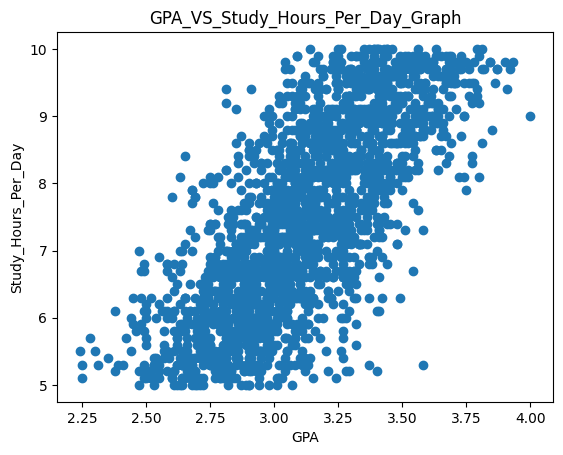

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data['GPA'],data['Study_Hours_Per_Day'])
plt.xlabel('GPA')
plt.ylabel('Study_Hours_Per_Day')
plt.title('GPA_VS_Study_Hours_Per_Day_Graph')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Stress_Level'ı sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
data['Stress_Level_Encoded'] = label_encoder.fit_transform(data['Stress_Level'])

# KMeans ile kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data[['Stress_Level_Encoded']])

# Tahmin edilen kümeleri ekleyelim
data['Kume'] = kmeans.predict(data[['Stress_Level_Encoded']])

# Sonuçları inceleyelim
data[['Stress_Level', 'Stress_Level_Encoded', 'Kume']].head()





,Stress_Level,Stress_Level_Encoded,Kume
0,Moderate,2,1
1,Low,1,2
2,Low,1,2
3,Moderate,2,1
4,High,0,0


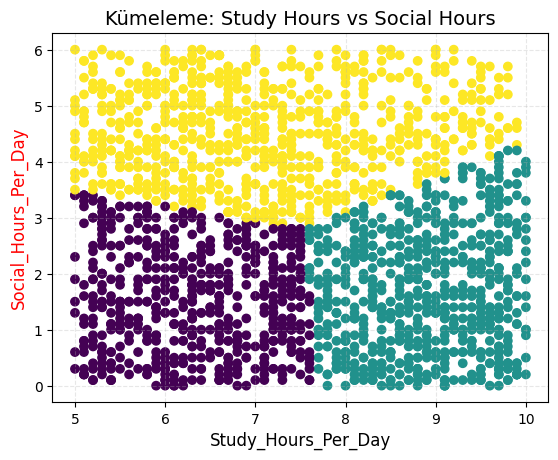

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['Study_Hours_Per_Day', 'Social_Hours_Per_Day']])
data['küme'] = kmeans.predict(data[['Study_Hours_Per_Day', 'Social_Hours_Per_Day']])
data


plt.scatter(data['Study_Hours_Per_Day'],data['Social_Hours_Per_Day'], c=data['küme'])
plt.title('Kümeleme: Study Hours vs Social Hours', fontsize=14)
plt.xlabel('Study_Hours_Per_Day', fontsize=12, color='black')
plt.ylabel('Social_Hours_Per_Day', fontsize=12, color='red')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

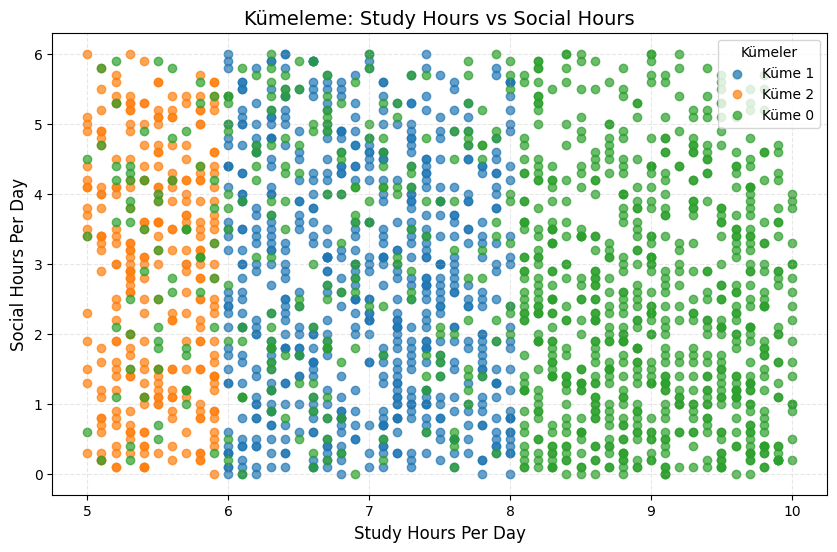

In [8]:
import matplotlib.pyplot as plt

# Scatter plot: Study_Hours_Per_Day ve Social_Hours_Per_Day
plt.figure(figsize=(10, 6))
for cluster in data['Kume'].unique():
    cluster_data = data[data['Kume'] == cluster]
    plt.scatter(
        cluster_data['Study_Hours_Per_Day'],
        cluster_data['Social_Hours_Per_Day'],
        label=f'Küme {cluster}',
        alpha=0.7
    )

plt.title('Kümeleme: Study Hours vs Social Hours', fontsize=14)
plt.xlabel('Study Hours Per Day', fontsize=12)
plt.ylabel('Social Hours Per Day', fontsize=12)
plt.legend(title="Kümeler")
plt.grid(alpha=0.3, linestyle='--')
plt.show()

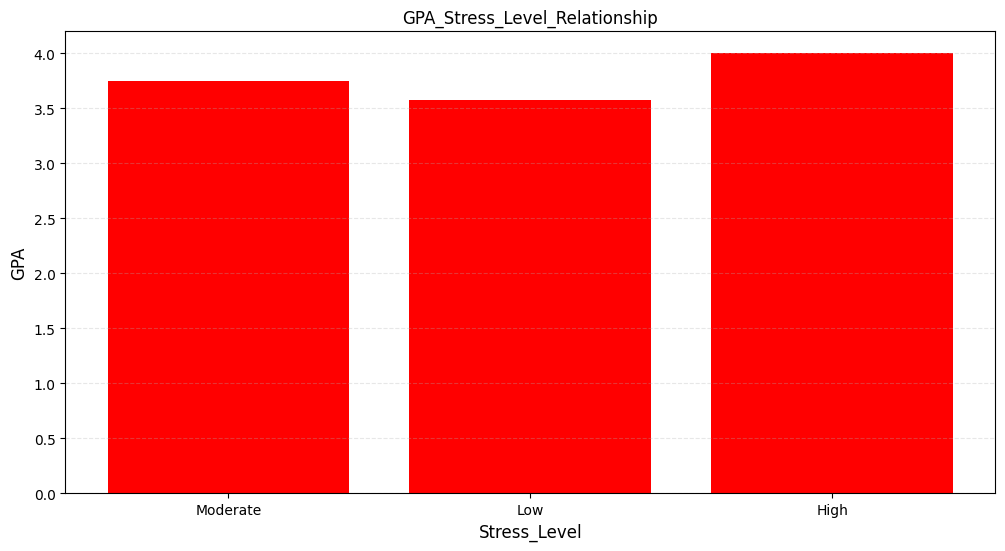

In [9]:
Stress_Level = data['Stress_Level']  # X ekseni için
GPA = data['GPA']

plt.figure(figsize=(12, 6))
plt.bar(Stress_Level, GPA, color='red')
plt.title('GPA_Stress_Level_Relationship',fontsize=12)
plt.xlabel('Stress_Level', fontsize=12)
plt.ylabel('GPA', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()